In [1]:
from google.colab import drive
from google.colab.patches import cv2_imshow
import cv2
import numpy as np
import matplotlib.pyplot as plt

drive.mount('/content/gdrive')

Mounted at /content/gdrive


(256, 256, 3)


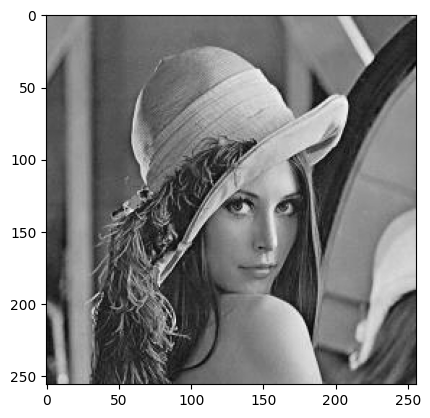

In [23]:
img = cv2.imread('/content/gdrive/My Drive/IP/Images/lena256.jpg')
print(img.shape)
gImg = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(gImg, cmap = 'gray')
#cv2_imshow(gImg)

로버츠 검출기

In [62]:
gx = np.array([[-1,0], [0,1]], dtype = int)
gy = np.array([[0,-1], [1,0]], dtype = int)

In [41]:
gx = np.array([[-1,0,0], [0,1,0], [0,0,0]], dtype = int)
gy = np.array([[0,0,-1], [0,1,0], [0,0,0]], dtype = int)

소벨 검출기

In [42]:
gx = np.array([[-1,0,1], [-2,0,2], [-1,0,1]], dtype = int)
gy = np.array([[1,2,1], [0,0,0], [-1,-2,-1]], dtype = int)

프리윗 검출기

In [69]:
gx = np.array([[-1,0,1], [-1,0,1], [-1,0,1]], dtype = int)
gy = np.array([[1,1,1], [0,0,0], [-1,-1,-1]], dtype = int)

에지검출

In [70]:
x = cv2.filter2D(gImg, -1, gx)
y = cv2.filter2D(gImg, -1, gy)

In [71]:
absX = cv2.convertScaleAbs(x)
absY = cv2.convertScaleAbs(y)

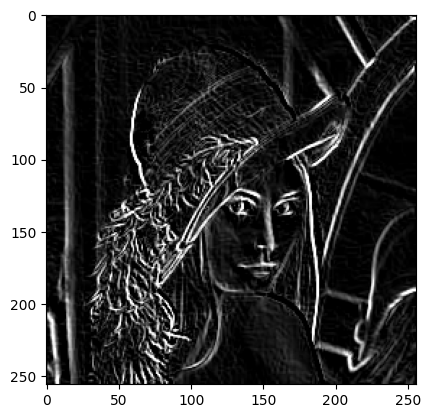

In [72]:
outImg = cv2.addWeighted(absX, 1, absY, 1, 0)
plt.imshow(outImg, cmap = 'gray')
#cv2_imshow(outImg)

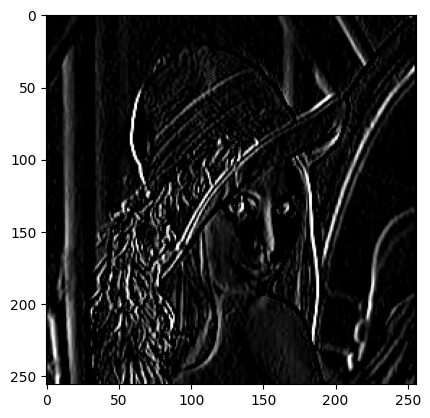

In [61]:
plt.imshow(absX, cmap = 'gray')

In [73]:
gBin = np.zeros(gImg.shape, dtype = int)

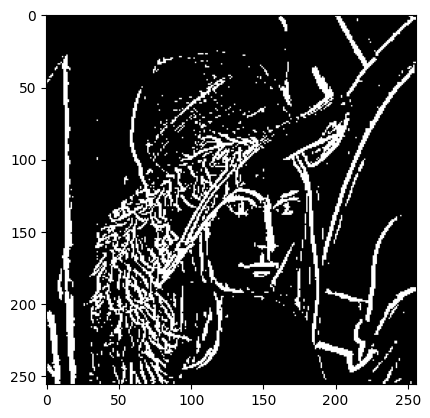

In [75]:
threshold = 60

for i in range(gImg.shape[0]):
  for j in range(gImg.shape[1]):
    if outImg[i,j] > threshold :
      gBin[i,j] = 255

plt.imshow(gBin, cmap = 'gray')

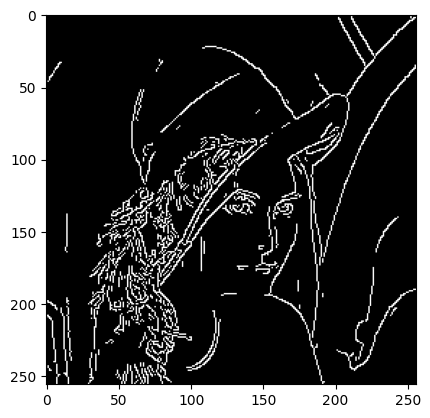

In [79]:
outImg = cv2.Canny(gImg, 200, 250)
plt.imshow(outImg, cmap = 'gray')